In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

print(tf.__version__)

2.2.0


In [2]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [0]:
# Linear Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(1, input_shape=(3, ),activation='linear'))  # 노드 3개인 출력층 생성

In [4]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [5]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 28.4597
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 24.7090
Epoch 3/1000
1/1 [==============================] - 0s 773us/step - loss: 22.1743
Epoch 4/1000
1/1 [==============================] - 0s 829us/step - loss: 20.2960
Epoch 5/1000
1/1 [==============================] - 0s 911us/step - loss: 18.7921
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 17.5181
Epoch 7/1000
1/1 [==============================] - 0s 704us/step - loss: 16.3983
Epoch 8/1000
1/1 [==============================] - 0s 860us/step - loss: 15.3914
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 14.4733
Epoch 10/1000
1/1 [==============================] - 0s 798us/step - loss: 13.6291
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 12.8486
Epoch 12/1000
1/1 [==============================] - 0s 959us/step - loss: 12.1245
Epoch 13/1000
1/1 [====

In [6]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss'])


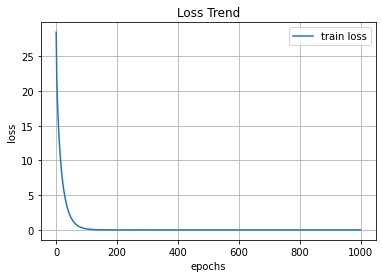

In [7]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [8]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-4.9999533]
 [-3.000014 ]
 [-4.0001183]
 [ 9.000137 ]
 [ 6.9999275]]
[-5, -3, -4, 9, 7]


In [13]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

Tensor("dense_input:0", shape=(None, 3), dtype=float32)
Tensor("dense/Identity:0", shape=(None, 1), dtype=float32)
[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.000014],
       [-2.999986],
       [ 2.00001 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-9.422281e-05], dtype=float32)>]
